# Simulation experiment for detection thresholds for variant calling

This notebook is to get detection thresholds for the limit of the variant calling based on: 

1. Read depth
2. Error rate
3. Number of mutations

The data from this comes from: https://pubs.acs.org/doi/10.1021/acscentsci.7b00548 Ape AGW


In [1]:
import pandas as pd
# Visualisation things to make the figures look nice
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sciutil import SciUtil


data_dir = 'ePCR_data/'
fig_dir = 'ePCR_figures/'


plt.rcParams['svg.fonttype'] = 'none'
axis_line_width = 1.0
axis_font_size = 12
title_font_size = 12
label_font_size = 10
figsize = (5, 4) # Figure size
font = 'Arial'
style = 'ticks'
font_family = 'sans-serif'

# Create a figure with 2x2 subplots
sns.set_style("whitegrid")
cmap = 'viridis'
palette = sns.color_palette("viridis", as_cmap=True)
sns.set_palette(cmap)

sns.set(rc={'figure.figsize': figsize, 'font.family': font_family,
            'font.sans-serif': font, 'font.size': label_font_size}, style=style)

def set_ax_params(ax):
    ax.tick_params(direction='out', length=2, width=axis_line_width)
    ax.spines['bottom'].set_linewidth(axis_line_width)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(axis_line_width)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=axis_font_size)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.tick_params(labelsize=label_font_size)


u = SciUtil()

# Generate mutations on a "real" sequence
# Decided to choose tauD from Ecoli K12

parent_sequence_aa = 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACDVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERVRARFGAWILDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPHIPLRYLIAWIYPITATIKPFLAKKGGSPEDIEGMYNAWFKSVVLQVAIWSHPYTKENDWLEHHHHHH*'

parent_sequence = 'ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGAAGTCACCCATCACGGACCTTGAGTTTGACCTTCTGAAGAAGACTGTCATGTTAGGTGAAAAGGACGTAATGTACTTGAAAAAGGCGTGTGACGTTCTGAAAGATCAAGTTGATGAGATCCTTGACTTGGCGGGTGGTTGGGTAGCATCAAATGAGCATTTGATTTATTACTTCTCCAATCCGGATACAGGAGAGCCTATTAAGGAATACCTGGAACGTGTACGCGCTCGCTTTGGAGCCTGGATTCTGGACACTACCTGCCGCGACTATAACCGTGAATGGTTAGACTACCAGTACGAAGTTGGGCTTCGTCATCACCGTTCAAAGAAAGGGGTCACAGACGGAGTACGCACCGTGCCCCATATCCCACTTCGTTATCTTATCGCATGGATCTATCCTATCACCGCCACTATCAAGCCATTTTTGGCTAAGAAAGGTGGCTCTCCGGAAGACATCGAAGGGATGTACAACGCTTGGTTCAAGTCTGTAGTTTTACAAGTTGCCATCTGGTCACACCCTTATACTAAGGAGAATGACTGGCTCGAGCACCACCACCACCACCACTGA'

In [2]:
! pip freeze | grep levseq

levseq @ file:///Users/arianemora/Documents/code/MinION/dist/levseq-1.0.3.tar.gz#sha256=b67cd2c0070615c4aa955b0b77dfe3d275a977778229425706296d14131a8a87


# Introduce mutations at a given frequency and an error rate

Test setup:

Change to 0.1 - 5% 0.2% step size. 

1. For number of mutations from 1 to the sequence length test mutating each one and correlate this to the p value
2. For sequencing error rates from 0 to 100% make sequences ranging with this and see what the results are for the p value and the error
3. For different sequence lengths also check how sequence length corresponds to the pvalue

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
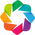

Loading BokehJS ...

In [3]:
from levseq import *
from tqdm import tqdm

label = 'ParLQ'

## Experiment 1: Varying the sequencing error rate for a single mutation

In [4]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 10
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1

experiment_df = pd.DataFrame()
for sequencing_error in range(0, 50, 5):
    sequencing_error_rate = sequencing_error/100.0
    run_df = make_experiment(f'SeqError_{sequencing_error}', read_depth, sequencing_error_rate, parent_sequence,
                             library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

# Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment1_SeqError_{label}.csv', index=False)

  2%|███▍                                                                                                                                                                  | 2/96 [00:00<00:17,  5.36it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.43006535947712426
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4016339869281046
-----------------------------------------


  4%|██████▉                                                                                                                                                               | 4/96 [00:00<00:17,  5.32it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40784313725490196
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4178104575163399
-----------------------------------------


  6%|██████████▍                                                                                                                                                           | 6/96 [00:01<00:16,  5.37it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4004901960784314
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41192810457516343
-----------------------------------------


  8%|█████████████▊                                                                                                                                                        | 8/96 [00:01<00:15,  5.64it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40767973856209144
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4165032679738562
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4027777777777778
-----------------------------------------


 11%|██████████████████▉                                                                                                                                                  | 11/96 [00:02<00:15,  5.54it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4148692810457516
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4209150326797386
-----------------------------------------


 14%|██████████████████████▎                                                                                                                                              | 13/96 [00:02<00:15,  5.39it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4151960784313725
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40816993464052287
-----------------------------------------


 16%|█████████████████████████▊                                                                                                                                           | 15/96 [00:02<00:15,  5.20it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41225490196078435
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4062091503267974
-----------------------------------------


 19%|██████████████████████████████▉                                                                                                                                      | 18/96 [00:03<00:14,  5.36it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4047385620915033
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.42320261437908496
-----------------------------------------


 22%|████████████████████████████████████                                                                                                                                 | 21/96 [00:03<00:14,  5.27it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41781045751633983
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41356209150326795
-----------------------------------------


 24%|███████████████████████████████████████▌                                                                                                                             | 23/96 [00:04<00:13,  5.33it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4148692810457516
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4130718954248365
-----------------------------------------


 25%|█████████████████████████████████████████▎                                                                                                                           | 24/96 [00:04<00:13,  5.43it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4080065359477124
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4160130718954248
-----------------------------------------


 27%|████████████████████████████████████████████▋                                                                                                                        | 26/96 [00:04<00:13,  5.34it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.405718954248366
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40620915032679733
-----------------------------------------


 29%|████████████████████████████████████████████████▏                                                                                                                    | 28/96 [00:05<00:12,  5.34it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4037581699346406
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4133986928104575
-----------------------------------------


 32%|█████████████████████████████████████████████████████▎                                                                                                               | 31/96 [00:05<00:12,  5.10it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40604575163398693
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40784313725490196
-----------------------------------------


 33%|███████████████████████████████████████████████████████                                                                                                              | 32/96 [00:06<00:12,  5.18it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4140522875816993
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4050653594771242
-----------------------------------------


 36%|████████████████████████████████████████████████████████████▏                                                                                                        | 35/96 [00:06<00:11,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40228758169934636
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41421568627450983
-----------------------------------------


 39%|███████████████████████████████████████████████████████████████▌                                                                                                     | 37/96 [00:06<00:11,  5.25it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40441176470588236
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4073529411764706
-----------------------------------------


 40%|█████████████████████████████████████████████████████████████████▎                                                                                                   | 38/96 [00:07<00:11,  5.27it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41160130718954246
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41699346405228754
-----------------------------------------


 42%|████████████████████████████████████████████████████████████████████▊                                                                                                | 40/96 [00:07<00:10,  5.32it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4037581699346405
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4053921568627451
-----------------------------------------


 44%|████████████████████████████████████████████████████████████████████████▏                                                                                            | 42/96 [00:07<00:10,  5.30it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4068627450980392
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40375816993464053
-----------------------------------------


 47%|█████████████████████████████████████████████████████████████████████████████▎                                                                                       | 45/96 [00:08<00:09,  5.60it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4088235294117647
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.42205882352941176
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40931372549019607
-----------------------------------------


 50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 48/96 [00:09<00:09,  5.22it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41013071895424835
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4065359477124183
-----------------------------------------


 52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 50/96 [00:09<00:08,  5.28it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.42385620915032685
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40441176470588236
-----------------------------------------


 55%|███████████████████████████████████████████████████████████████████████████████████████████                                                                          | 53/96 [00:09<00:08,  5.26it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4111111111111111
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41225490196078435
-----------------------------------------


 57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 55/96 [00:10<00:07,  5.55it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4094771241830065
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41437908496732023
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41781045751633983
-----------------------------------------


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 57/96 [00:10<00:07,  5.43it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4116013071895425
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40555555555555556
-----------------------------------------


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 59/96 [00:11<00:06,  5.59it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4047385620915033
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40866013071895424
-----------------------------------------


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 62/96 [00:11<00:05,  5.72it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4076797385620915
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4071895424836601
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4106209150326797
-----------------------------------------


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 64/96 [00:12<00:06,  5.13it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4143790849673203
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4133986928104575
-----------------------------------------


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 67/96 [00:12<00:05,  5.51it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4032679738562091
-----------------------------------------


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 69/96 [00:12<00:04,  5.47it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4089869281045752
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4161764705882353
-----------------------------------------


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 72/96 [00:13<00:04,  5.28it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40751633986928104
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4060457516339869
-----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 74/96 [00:13<00:04,  5.27it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40866013071895424
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41764705882352937
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.42009803921568634
-----------------------------------------


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 76/96 [00:14<00:03,  5.38it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41568627450980394
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.42320261437908496
-----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 78/96 [00:14<00:03,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4158496732026144
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4107843137254902
-----------------------------------------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 80/96 [00:14<00:03,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4166666666666667
-----------------------------------------


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 81/96 [00:15<00:03,  4.93it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4266339869281045
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41307189542483663
-----------------------------------------


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 84/96 [00:15<00:02,  5.43it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40326797385620916
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4088235294117647
-----------------------------------------


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 86/96 [00:16<00:01,  5.61it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41421568627450983
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4088235294117647
-----------------------------------------


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 88/96 [00:16<00:01,  5.49it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.40637254901960784
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41143790849673206
-----------------------------------------


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 91/96 [00:17<00:00,  5.41it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41013071895424835
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.41683006535947714
-----------------------------------------


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 93/96 [00:17<00:00,  5.46it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4024509803921568
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.43104575163398684
-----------------------------------------


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 95/96 [00:17<00:00,  5.63it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4091503267973856
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4117647058823529
-----------------------------------------


  1%|█▋                                                                                                                                                                    | 1/96 [00:00<00:18,  5.23it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4584967320261438
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4686274509803921
-----------------------------------------


  3%|█████▏                                                                                                                                                                | 3/96 [00:00<00:18,  5.15it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4619281045751635
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4591503267973856
-----------------------------------------


  6%|██████████▍                                                                                                                                                           | 6/96 [00:01<00:17,  5.22it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4676470588235294
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.44869281045751636
-----------------------------------------


  7%|████████████                                                                                                                                                          | 7/96 [00:01<00:17,  5.23it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4627450980392156
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45114379084967327
-----------------------------------------


  9%|███████████████▌                                                                                                                                                      | 9/96 [00:01<00:16,  5.43it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45212418300653595
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45196078431372555
-----------------------------------------


 12%|████████████████████▋                                                                                                                                                | 12/96 [00:02<00:15,  5.49it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45816993464052286
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4609477124183007
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4665032679738562
-----------------------------------------


 15%|████████████████████████                                                                                                                                             | 14/96 [00:02<00:15,  5.40it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4663398692810458
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45098039215686275
-----------------------------------------


 18%|█████████████████████████████▏                                                                                                                                       | 17/96 [00:03<00:14,  5.33it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4674836601307189
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46209150326797377
-----------------------------------------


 19%|██████████████████████████████▉                                                                                                                                      | 18/96 [00:03<00:14,  5.33it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45800653594771235
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4477124183006536
-----------------------------------------


 22%|████████████████████████████████████                                                                                                                                 | 21/96 [00:03<00:14,  5.15it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45588235294117646
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4735294117647059
-----------------------------------------


 24%|███████████████████████████████████████▌                                                                                                                             | 23/96 [00:04<00:13,  5.24it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45098039215686275
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4632352941176471
-----------------------------------------


 25%|█████████████████████████████████████████▎                                                                                                                           | 24/96 [00:04<00:13,  5.26it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45179738562091504
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45800653594771235
-----------------------------------------


 28%|██████████████████████████████████████████████▍                                                                                                                      | 27/96 [00:05<00:13,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45718954248366017
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45816993464052286
-----------------------------------------


 29%|████████████████████████████████████████████████▏                                                                                                                    | 28/96 [00:05<00:12,  5.56it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4620915032679739
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45800653594771246
-----------------------------------------


 31%|███████████████████████████████████████████████████▌                                                                                                                 | 30/96 [00:05<00:12,  5.39it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.44477124183006533
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45294117647058824
-----------------------------------------


 33%|███████████████████████████████████████████████████████                                                                                                              | 32/96 [00:05<00:11,  5.63it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4601307189542484
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45098039215686275
-----------------------------------------


 35%|██████████████████████████████████████████████████████████▍                                                                                                          | 34/96 [00:06<00:11,  5.49it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4642156862745098
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45294117647058824
-----------------------------------------


 38%|█████████████████████████████████████████████████████████████▉                                                                                                       | 36/96 [00:06<00:11,  5.01it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4732026143790849
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4612745098039215
-----------------------------------------


 40%|█████████████████████████████████████████████████████████████████▎                                                                                                   | 38/96 [00:07<00:11,  5.17it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.44901960784313716
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45539215686274515
-----------------------------------------


 42%|████████████████████████████████████████████████████████████████████▊                                                                                                | 40/96 [00:07<00:10,  5.25it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45490196078431366
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4681372549019608
-----------------------------------------


 45%|█████████████████████████████████████████████████████████████████████████▉                                                                                           | 43/96 [00:08<00:10,  5.25it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4602941176470589
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4583333333333333
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4535947712418301
-----------------------------------------


 48%|███████████████████████████████████████████████████████████████████████████████                                                                                      | 46/96 [00:08<00:09,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45702614379084977
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45686274509803926
-----------------------------------------


 50%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 48/96 [00:09<00:08,  5.53it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.47009803921568627
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4503267973856209
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45114379084967327
-----------------------------------------


 52%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 50/96 [00:09<00:08,  5.42it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.461437908496732
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4485294117647059
-----------------------------------------


 54%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                           | 52/96 [00:09<00:08,  5.35it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45539215686274515
-----------------------------------------


 56%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 54/96 [00:10<00:08,  5.05it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.47549019607843135
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45228758169934635
-----------------------------------------


 57%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 55/96 [00:10<00:07,  5.13it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4537581699346405
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45588235294117646
-----------------------------------------


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 58/96 [00:10<00:07,  5.21it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4555555555555555
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46192810457516337
-----------------------------------------


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 59/96 [00:11<00:07,  5.24it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46879084967320256
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46339869281045754
-----------------------------------------


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 61/96 [00:11<00:06,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45751633986928103
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.47647058823529415
-----------------------------------------


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 63/96 [00:11<00:06,  5.28it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4534313725490196
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45767973856209143
-----------------------------------------


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 66/96 [00:12<00:05,  5.30it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46274509803921565
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4552287581699347
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4702614379084967
-----------------------------------------


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 68/96 [00:12<00:05,  5.31it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4601307189542483
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46486928104575165
-----------------------------------------


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 70/96 [00:13<00:05,  4.95it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4622549019607844
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4609477124183007
-----------------------------------------


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 72/96 [00:13<00:04,  5.14it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45588235294117646
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4573529411764706
-----------------------------------------


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 74/96 [00:14<00:04,  5.23it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45898692810457514
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4537581699346404
-----------------------------------------


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 76/96 [00:14<00:03,  5.27it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46339869281045754
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4632352941176471
-----------------------------------------


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 78/96 [00:14<00:03,  5.31it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46568627450980393
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46437908496732033
-----------------------------------------


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 80/96 [00:15<00:03,  5.26it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46094771241830057
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45882352941176474
-----------------------------------------


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 82/96 [00:15<00:02,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.456045751633987
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45686274509803926
-----------------------------------------


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 85/96 [00:16<00:02,  5.30it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46846405228758176
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45882352941176463
-----------------------------------------


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 86/96 [00:16<00:01,  5.29it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46209150326797377
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46437908496732033
-----------------------------------------


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 89/96 [00:16<00:01,  5.14it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46078431372549017
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45196078431372555
-----------------------------------------


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 91/96 [00:17<00:00,  5.16it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45800653594771235
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45571895424836595
-----------------------------------------


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 92/96 [00:17<00:00,  5.16it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45669934640522875
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4415032679738562
-----------------------------------------


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 94/96 [00:17<00:00,  5.18it/s]

-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.4462418300653595
-----------------------------------------
-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.45571895424836595
-----------------------------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:18<00:00,  5.26it/s]


-----------------------------------------
WARNING!!! Your mean error rate across was too high!!! It was:  0.46895424836601307
-----------------------------------------


## Experiment 2: varying read depth and it's effect on significance

In [5]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 0
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1

# Here we do it from 1-10 completely and then in intervals of 10 so that we can clearly see the impact
experiment_df = pd.DataFrame()
for read_depth in range(1, 30, 1):
    run_df = make_experiment(f'ReadDepth_{read_depth}', read_depth, sequencing_error, parent_sequence, 
                     library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])
    
 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment2_ReadDepth_{label}.csv', index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:16<00:00,  5.70it/s]


## Experiment 3: effect of sequence length on significance


In [6]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 10
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1


experiment_df = pd.DataFrame()
for seq_len in range(5, 2000, 50):
    if seq_len >= len(parent_sequence):
        break
    run_df = make_experiment(f'SeqLen_{seq_len}', read_depth, sequencing_error, parent_sequence[:seq_len*3],
             library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

# Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment3_{label}.csv', index=False)


  0%|                                                                                                                                                                              | 0/22 [00:00<?, ?it/s]/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 143.58it/s]
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/levseq/simulation.py:311: RuntimeWarning: invalid value encountered in divide
  variant_df['accuracy'] = np.array(corrects) / (np.array(corrects

  0%|                                                                                                                                                                              | 0/92 [00:00<?, ?it/s]/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:04<00:00, 22.44it/s]
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/levseq/simulation.py:311: RuntimeWarning: invalid value encountered in divide
  variant_df['accuracy'] = np.array(corrects) / (np.array(corrects

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:14<00:00,  6.45it/s]


## Experiment 4: effect of frequency cutoff

In [7]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 10
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1

experiment_df = pd.DataFrame()
for frequency_cutoff in range(5, 100, 10):
    run_df = make_experiment(f'FreqCutoff_{frequency_cutoff}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, epcr_mutation_rate, frequency_cutoff/100.0)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment4_{label}.csv', index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:14<00:00,  6.47it/s]


## Experiment 5: ePCR mutation rate

In [8]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 10
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1


experiment_df = pd.DataFrame()
for epcr_mutation_rate in range(1, 20, 2):
    run_df = make_experiment(f'ePCR_{epcr_mutation_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate/1000.0, frequency_cutoff)
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment5_{label}.csv', index=False)


  2%|████                                                                                                                                                                  | 1/41 [00:00<00:06,  6.29it/s]/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:06<00:00,  6.47it/s]
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/levseq/simulation.py:311: RuntimeWarning: invalid value encountered in divide
  variant_df['accuracy'] = np.array(corrects) / (np.array(corrects

 14%|██████████████████████▊                                                                                                                                              | 12/87 [00:01<00:11,  6.56it/s]/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [00:13<00:00,  6.49it/s]
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/levseq/simulation.py:311: RuntimeWarning: invalid value encountered in divide
  variant_df['accuracy'] = np.array(corrects) / (np.array(corrects

 26%|███████████████████████████████████████████                                                                                                                          | 24/92 [00:03<00:10,  6.46it/s]/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:14<00:00,  6.45it/s]
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/levseq/simulation.py:311: RuntimeWarning: invalid value encountered in divide
  variant_df['accuracy'] = np.array(corrects) / (np.array(corrects

 15%|████████████████████████▌                                                                                                                                            | 14/94 [00:02<00:12,  6.38it/s]/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:14<00:00,  6.30it/s]
/Users/arianemora/miniconda3/envs/minion/lib/python3.8/site-packages/levseq/simulation.py:311: RuntimeWarning: invalid value encountered in divide
  variant_df['accuracy'] = np.array(corrects) / (np.array(corrects

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:15<00:00,  6.33it/s]


## Experiment 6: mixed well rates


In [9]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 10
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1
number_wells_to_mix = 20
experiment_df = pd.DataFrame()

for mixture_rate in range(10, 90, 10):
    run_df = make_experiment(f'mixedWells_{mixture_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate, frequency_cutoff, number_wells_to_mix, mixture_rate/100.0, 
                             qc_files_path='/Users/arianemora/Documents/code/MinION/simulation/ePCR_QC/')
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment6_{label}.csv', index=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:16<00:00,  5.90it/s]


In [10]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 10
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.2
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1
number_wells_to_mix = 20
experiment_df = pd.DataFrame()

for mixture_rate in range(10, 90, 10):
    run_df = make_experiment(f'mixedWells_{mixture_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate, frequency_cutoff, number_wells_to_mix, mixture_rate/100.0, 
                             qc_files_path='/Users/arianemora/Documents/code/MinION/simulation/ePCR_QC/')
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment6_freq_0.2_{label}.csv', index=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:16<00:00,  5.75it/s]


In [11]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 20
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.5
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1
number_wells_to_mix = 20
experiment_df = pd.DataFrame()

for mixture_rate in range(10, 90, 10):
    run_df = make_experiment(f'mixedWells_{mixture_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate, frequency_cutoff, number_wells_to_mix, mixture_rate/100.0, 
                             qc_files_path='/Users/arianemora/Documents/code/MinION/simulation/ePCR_QC/')
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])

 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment6_freq_20_{label}.csv', index=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:17<00:00,  5.59it/s]


In [12]:
# We're going to make an experiment of 10 plates with different sequencing error rates
read_depth = 20
number_of_wells = 96
epcr_mutation_rate = 0.02
frequency_cutoff = 0.2
library_number = 96 # Usually do a 96 well plate
verbose = False
sequencing_error = 0.1
number_wells_to_mix = 20
experiment_df = pd.DataFrame()

for mixture_rate in range(10, 90, 10):
    run_df = make_experiment(f'mixedWells_{mixture_rate}', read_depth, sequencing_error, parent_sequence, library_number, number_of_wells, 
                             epcr_mutation_rate, frequency_cutoff, number_wells_to_mix, mixture_rate/100.0, 
                             qc_files_path='/Users/arianemora/Documents/code/MinION/simulation/ePCR_QC/')
    run_df.reset_index(inplace=True)
    experiment_df = pd.concat([experiment_df, run_df])
 # Also plot each one
experiment_df.to_csv(f'{data_dir}Experiment6_freq_20_0.2_{label}.csv', index=False)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:17<00:00,  5.51it/s]
